## Intro
This was inspired by the work of [Richard Taylor, PhD](https://blogs.uoregon.edu/richardtaylor/) who used the box counting method on paintings by [Jackson Pollock](https://www.jackson-pollock.org) to determine the fractal dimension of the work. I'm recreating this to learn more about fractals, python (numpy and matplotlib mainly), and programming in general. 

Resources (some accessed using USC institutional access):
- [*Fractal expressionism*, Taylor, Micolich, Jonas](http://iopscience.iop.org/article/10.1088/2058-7058/12/10/21/meta)
- [*Using science to investigate Jackson Pollock's drip paintings*, Taylor, Micolish, Jonas](http://www.ingentaconnect.com/contentone/imp/jcs/2000/00000007/F0020008/1048) This the same work as above, with a longer description of relevance.
- [*Physics and Fractal Structures*](http://www.jfgouyet.fr/fractal/fractauk.html)
- [*Fractals in the Neurosciences, Part I: General Principles and Basic Neurosciences*](http://www.junkdna.com/pellionisz_diieva_neuroscientist.pdf)
- [*Number 14: Gray 1948*](https://artgallery.yale.edu/collections/objects/33977)
- [*Number 14 1951*](http://www.tate.org.uk/art/artworks/pollock-number-14-t03978)
- [*Autumn Rhythm (Number 30)*](https://www.metmuseum.org/toah/works-of-art/57.92/)
- [*Blue Poles Number 11*](https://www.jackson-pollock.org/blue-poles.jsp)


### Note:
This is a work in progress, so it has toubleshooting code (.method() or .attribute?), printing of data to make sure output = expected, and sparse comments. Maybe I'll tidy up someday.

In [114]:
from IPython.display import Image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import MultipleLocator
from scipy import stats

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
filename = 'number-14-gray.jpg' #FractalImg/pollock-Num14.jpg
filepath = './FractalImg/' + filename;
filepath

'./FractalImg/number-14-gray.jpg'

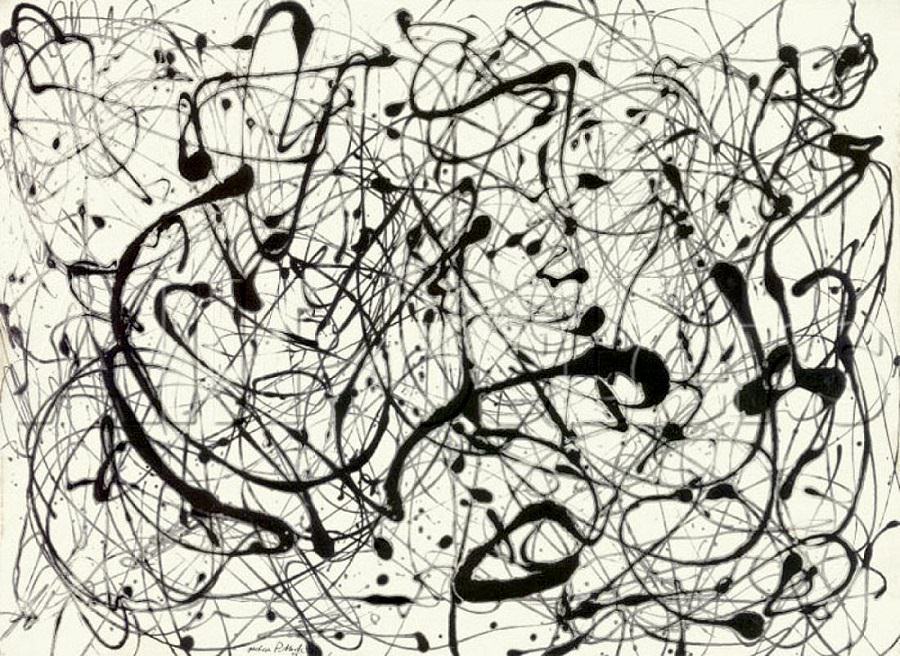

In [4]:
Image(filepath)

In [5]:
# Img = io.imread('./FractalImg/pollock-Num14.jpg') # use scikit-image io
Img = mpimg.imread(filepath) # use matplotlib image
# Img = mpimg.imread('./FractalImg/pollock-Num14.png') # use matplotlib image but trying png
type(Img) # both make ndarray, but the dtypes are different

numpy.ndarray

In [6]:
Img.shape
#(H, W, RGB)
# coresponding to 570 x 785 mm. ~ 1.15 pixels per 1 mm. 1 px ~ 0.87 mm

(656, 900, 3)

In [7]:
Img.min(), Img.max() # with png format all values are scaled between 0 and 1. With jpg (0-255)

(0, 255)

In [8]:
Img.mean()

178.61138888888888

In [9]:
print(Img)

[[[227 218 203]
  [232 223 208]
  [235 228 210]
  ..., 
  [240 241 225]
  [238 239 223]
  [238 239 223]]

 [[230 221 206]
  [232 223 208]
  [234 227 209]
  ..., 
  [239 240 224]
  [237 238 222]
  [237 238 222]]

 [[233 226 210]
  [233 226 210]
  [233 226 208]
  ..., 
  [238 239 223]
  [236 237 221]
  [237 238 222]]

 ..., 
 [[212 210 195]
  [230 228 213]
  [232 230 215]
  ..., 
  [248 247 229]
  [242 241 223]
  [236 235 217]]

 [[216 214 199]
  [230 228 213]
  [228 226 211]
  ..., 
  [246 245 225]
  [245 244 224]
  [245 244 224]]

 [[228 226 211]
  [240 238 223]
  [236 234 219]
  ..., 
  [241 240 220]
  [246 245 225]
  [249 248 228]]]


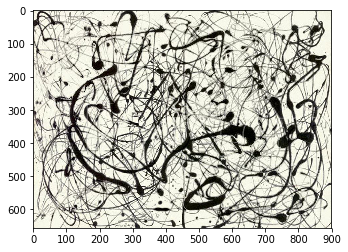

In [10]:
%matplotlib inline
plt.imshow(Img)

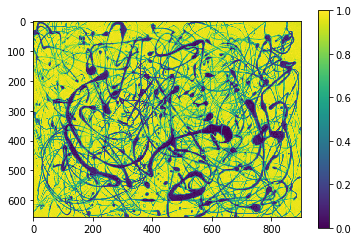

In [11]:
SingLayer = Img[:,:,0]/255 #first layer of image. Don't need to scale png like jpg with /255
slplot = plt.imshow(SingLayer) #default(LUT) for 2D images is 'viridis'.
plt.colorbar()

In [12]:
print(SingLayer[1:10,1:10])

[[ 0.90980392  0.91764706  0.91764706  0.90980392  0.90588235  0.92156863
   0.9254902   0.94117647  0.91372549]
 [ 0.91372549  0.91372549  0.91764706  0.92156863  0.9254902   0.9372549
   0.9372549   0.92156863  0.90588235]
 [ 0.9254902   0.92156863  0.9254902   0.93333333  0.94901961  0.95294118
   0.94901961  0.92156863  0.91372549]
 [ 0.94117647  0.9372549   0.9372549   0.94901961  0.96078431  0.96470588
   0.95686275  0.9372549   0.9372549 ]
 [ 0.94509804  0.94901961  0.95294118  0.95686275  0.95686275  0.95294118
   0.95686275  0.95686275  0.96078431]
 [ 0.94509804  0.96078431  0.96078431  0.94901961  0.93333333  0.9372549
   0.94509804  0.96078431  0.97647059]
 [ 0.93333333  0.95686275  0.95686275  0.9372549   0.92156863  0.92156863
   0.93333333  0.95686275  0.98039216]
 [ 0.94117647  0.94901961  0.95294118  0.94901961  0.94901961  0.95294118
   0.95686275  0.96862745  0.99215686]
 [ 0.94901961  0.95686275  0.96078431  0.95686275  0.96078431  0.96470588
   0.97254902  0.9607843

In [13]:
SingLayer.dtype #jpg is also 'float64' instead of png 'float32'

dtype('float64')

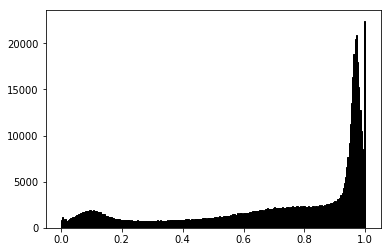

In [14]:
plt.hist(SingLayer.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k'); #magic fucking semi-colon

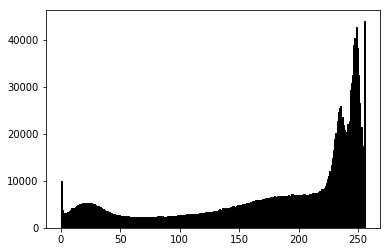

In [15]:
plt.hist(Img.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');
# spent time converting to png bc wasn't finding histogram output. Output
# still shows with jpg, and even with 3 layers

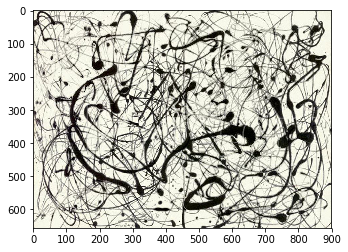

In [17]:
plt.imshow(Img, clim=(200, 256)) #clim = color limit? supposed to clip values outside the range
# nothing changing for the 3 layer array

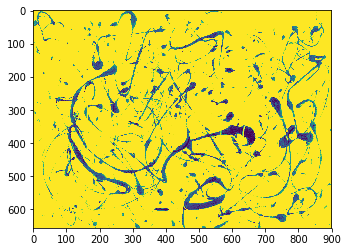

In [18]:
plt.imshow(SingLayer, clim=(0.0, 0.3)) # now we see changes

In [19]:
# try to 'flatten' 3 layer img to make black and white
bw = Img.mean(3-1)
bw.shape

(656, 900)

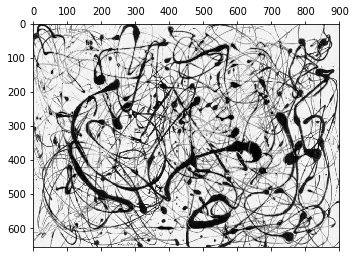

In [20]:
plt.matshow(bw, cmap=plt.cm.gray)

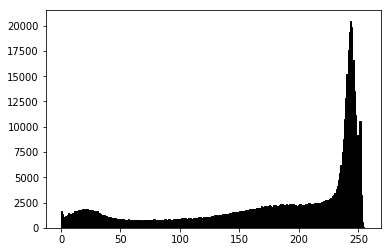

In [21]:
# need to binarize 
bwhist = plt.hist(bw.ravel(), bins=256, range=(0, 256), fc = 'k', ec='k'); # fc = facecolor, ec = edgecolor

In [22]:
# so everything between 0-150 is black and 151-256 is white?
# lets try it

binbw = np.zeros(bw.shape)
bw[0:10, 0:10]

array([[ 216.        ,  221.        ,  224.33333333,  223.33333333,
         220.        ,  218.33333333,  222.33333333,  226.        ,
         235.        ,  227.33333333],
       [ 219.        ,  221.        ,  223.33333333,  223.33333333,
         221.        ,  221.        ,  224.33333333,  227.        ,
         231.66666667,  225.33333333],
       [ 223.        ,  223.        ,  222.33333333,  223.33333333,
         224.        ,  226.        ,  228.33333333,  230.        ,
         226.66666667,  223.33333333],
       [ 228.        ,  226.        ,  225.        ,  225.33333333,
         228.        ,  232.        ,  233.        ,  233.66666667,
         226.66666667,  225.33333333],
       [ 232.        ,  230.        ,  229.        ,  229.33333333,
         232.33333333,  235.        ,  236.        ,  235.66666667,
         230.66666667,  231.66666667],
       [ 231.33333333,  231.66666667,  232.66666667,  233.33333333,
         234.33333333,  234.        ,  234.66666667,  235

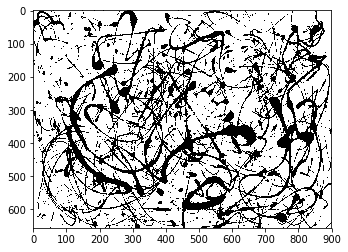

In [23]:
binbw[bw > 150] = 1
binbw[bw <= 150] = 0
plt.imshow(binbw, cmap=plt.cm.gray)

(array([ 169061.,       0.,  421339.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ]),
 <a list of 3 Patch objects>)

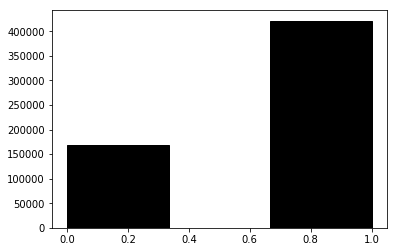

In [24]:
h = plt.hist(binbw.ravel(), bins=3, range=(0, 1), fc='k', ec='k');
h

(array([  18204.,   22402.,   19004.,   11965.,    9878.,    9700.,
          10064.,   11182.,   12031.,   13579.,   16673.,   19713.,
          23936.,   27094.,   28170.,   29882.,   30395.,   36934.,
         129563.,  110031.]),
 array([   0. ,   12.8,   25.6,   38.4,   51.2,   64. ,   76.8,   89.6,
         102.4,  115.2,  128. ,  140.8,  153.6,  166.4,  179.2,  192. ,
         204.8,  217.6,  230.4,  243.2,  256. ]),
 <a list of 20 Patch objects>)

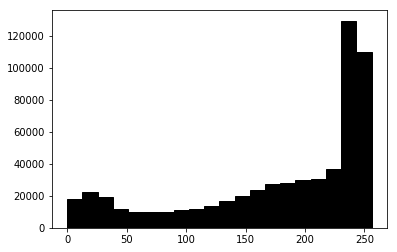

In [25]:
bwhist = plt.hist(bw.ravel(), bins=20, range=(0, 256), fc = 'k', ec='k')
bwhist

In [26]:
bwhist[0][-3] # where the white values increase

36934.0

In [27]:
bwhist[1][-3] # corresponding brightness value

230.40000000000001

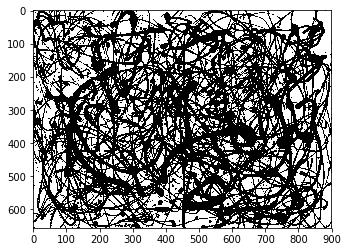

In [28]:
# try that as a threshold
binbw2 = np.ones(bw.shape)
binbw2[bw < 230.4] = 0;
plt.imshow(binbw2, cmap = plt.cm.gray)

In [29]:
# way too dark. lets try the opposite, where dark bins drop off in bw
bwhist[1][5]

64.0

In [30]:
bw.mean()

178.61138888888888

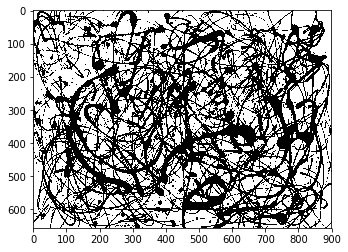

In [31]:
binbw2 = np.ones(bw.shape)
binbw2[bw < 200] = 0; #test different thresholds and visualize
plt.imshow(binbw2, cmap = plt.cm.gray)

Text(0.5,1,'400:600, 400:600')

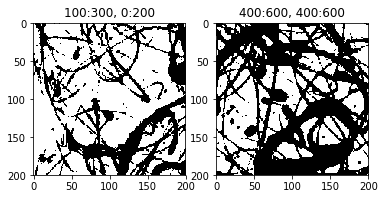

In [32]:
range1 = (slice(100,300), slice(0,200))
string1 = '100:300, 0:200'
range2 = (slice(400,600), slice(400,600))
string2 = '400:600, 400:600'

zoom = binbw2[range1] # binbw2 is thresholded to be either black or white
zoom2 = binbw2[range2]
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
sbplt = plt.imshow(zoom, cmap = plt.cm.gray)
a.set_title(string1)
a = fig.add_subplot(1, 2, 2)
sbplt = plt.imshow(zoom2, cmap = plt.cm.gray)
a.set_title(string2)

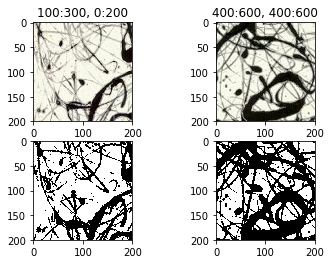

In [33]:
origzoom = Img[range1] # Img is 3 layers with RGB values, the original painting
origzoom2 = Img[range2]
bwzoom = bw[range1] # bw is the averaged, single layer image
bwzoom2 = bw[range2]

orig_fig = plt.figure()
orig_a = orig_fig.add_subplot(2, 2, 1)
orig_sbplt = plt.imshow(origzoom, cmap = plt.cm.gray)
orig_a.set_title(string1)
orig_a = orig_fig.add_subplot(2, 2, 2)
orig_sbplt = plt.imshow(origzoom2, cmap = plt.cm.gray)
orig_a.set_title(string2)

orig_a = orig_fig.add_subplot(2, 2, 3)
orig_sbplt = plt.imshow(zoom, cmap = plt.cm.gray)
orig_a = orig_fig.add_subplot(2, 2, 4)
orig_sbplt = plt.imshow(zoom2, cmap = plt.cm.gray)

In [34]:
# plt.imshow(zoom, cmap = plt.cm.binary) # inverts the colors

Text(0.5,1,'Original')

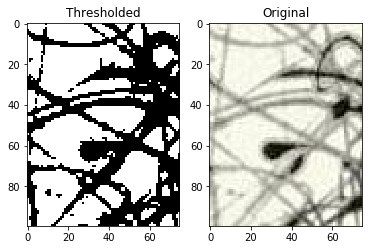

In [35]:
dkzoom = binbw2[50:150, 600:675]
dkorig = Img[50:150, 600:675]
last_fig = plt.figure()
last_sub = last_fig.add_subplot(1,2,1)
last_splt = plt.imshow(dkzoom, cmap = plt.cm.gray)
last_sub.set_title('Thresholded')
last_sub = last_fig.add_subplot(1,2,2)
last_splt = plt.imshow(dkorig, cmap = plt.cm.gray)
last_sub.set_title('Original')

- need to figure out an automatic way to threshold. Needs to preserve smaller streaks of paint, the "messiness" but not darken so much that the gaps are lost
- also, what happens if we get an object detection alg to outline objects? Or do a search for auto-binary bw option?

#### skipping the auto-thresh problem:
- Can move onto counting filled boxes (cross check these methods with paper). 
- Slice image/array into regions, if any numbers in that slice are 0 then it counts as filled (might need to invert at some point to sum/count?). Store zoom size and filled count. Smaller slices, count again. Repeat until...single pixel? 2x2 pixels? 

In [36]:
testmat = np.array([[0, 0], [0, 1]])
testmat

array([[0, 0],
       [0, 1]])

In [51]:
testscan = np.zeros((2,2))
testscan

array([[ 0.,  0.],
       [ 0.,  0.]])

In [38]:
np.array([testmat == testscan]).any()

True

In [53]:
testmat2 = np.array([[1, 1], [1, 0]])
np.array([testmat2 == testscan]).any()

True

In [39]:
index = (slice(100,300), slice(0,200))
index

(slice(100, 300, None), slice(0, 200, None))

In [40]:
str(index[0])[6:14] + ' ' + str(index[1])[6:14]

'100, 300 0, 200, '

In [41]:
str(index[1])[6:14]

'0, 200, '

### Back to the process

In [42]:
Img.shape

(656, 900, 3)

In [43]:
print(656 % 2)
print(656 / 2)

0
328.0


In [46]:
iternum = 1
numsquares = 1
squaresize = Img.shape[0]
while squaresize % 2 == 0:
    numsquares = 4 ** iternum
    squaresize = squaresize/2
    iternum += 1
    print('Number of squares: {0}, Square size: {1}'.format(numsquares, squaresize))


Number of squares: 4, Square size: 328.0
Number of squares: 16, Square size: 164.0
Number of squares: 64, Square size: 82.0
Number of squares: 256, Square size: 41.0


With ~ 1.15 pixels per 1 mm. 1 px ~ 0.87 mm, corresponding to 570 x 785 mm. Width-wise the smallest squares we can make are 41 pixels by 41 pixels, or about 35.7 mm of original canvas. But the paper we're following discusses sizes of 1 mm. I'm not sure how they achieved this, except with a super high resolution camera, but even then the painting is not a square, so their methods don't quite make sense.

"We calculate D using a well-established technique called the ‘box-counting’
method, demonstrated in figure 4b (Gouyet, 1996). We cover the scanned photograph ofa Pollock painting with a computer-generated mesh ofidentical squares. The number ofsquares N(L) which contain part ofthe painted pattern (the shaded squares in Fig. 4b) is then counted. This count is repeated as the size L of the squares in the mesh is reduced. In this way the amount ofcanvas filled by the pattern can be compared at different magnifications. The largest size of square is chosen to match the canvas size (typically 2 metres) and the smallest is chosen to match the finest paint work (0.8 millimetres)." - Taylor, Micolich, Jonas. *Using Science to Investigate jackson Pollock's Drip Paintings*. 

Go backwards and build squares until their pixel value exceeds the image dimensions?  Use only square sizes that evenly divide into the image dimension (height, as the limiting size dimension)?


In [47]:
SquareBW = binbw2[0:656, 0:656]

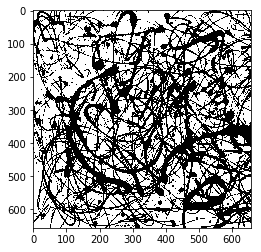

In [133]:
plt.imshow(SquareBW, cmap = plt.cm.gray)

In [104]:
BoxSize = np.array([])
FilledCount = np.array([])
for i in range(1,657):
    if 656 % i == 0:
        scanbox = np.zeros((i, i))
        BoxSize = np.append(BoxSize, [i])
        count = 0
        for row in range(0, 656, i): #convenient that it will stop i short of the end
            rowidx = slice(row, row + i)
            for col in range(0, 656, i):
                colidx = slice(col, col + i)
                imgbox = SquareBW[rowidx, colidx]
                if np.array([imgbox == scanbox]).any():
                    count += 1
        FilledCount = np.append(FilledCount, [count])

In [122]:
print(BoxSize)
print(FilledCount)
Box2mm = BoxSize * (570/656)
print(Box2mm)

[   1.    2.    4.    8.   16.   41.   82.  164.  328.  656.]
[  1.99363000e+05   6.06570000e+04   1.93480000e+04   5.91800000e+03
   1.63800000e+03   2.56000000e+02   6.40000000e+01   1.60000000e+01
   4.00000000e+00   1.00000000e+00]
[   0.86890244    1.73780488    3.47560976    6.95121951   13.90243902
   35.625        71.25        142.5         285.          570.        ]


In [106]:
FC = -np.log10(FilledCount)
FC

array([-5.29964456, -4.78288093, -4.28663608, -3.77217496, -3.2143139 ,
       -2.40823997, -1.80617997, -1.20411998, -0.60205999, -0.        ])

In [123]:
BS = np.log10(Box2mm)
BS 

array([-0.06102898,  0.24000101,  0.54103101,  0.842061  ,  1.143091  ,
        1.55175487,  1.85278487,  2.15381486,  2.45484486,  2.75587486])

In [131]:
DDslope, DDintercept, r_value, p_value, std_err = stats.linregress(BS[0:6], FC[0:6]) 
DDfitline = DDslope*BS + DDintercept
# the paper calculated a different fit for "short" (1-50mm) scales and "long' (10 - 2500mm)
# and yes I see the overlap in the text but not their figure.
# See above that Box2mm[6] = 35.625 and the next value is >50mm.
# Dd is for "drip dimension" as drip dynamics are supposed to be causes of fractility


# Dl is for "Levy flights dimension", something do to with arm and body movements with the brush
DLslope, DLintercept, r_value, p_value, std_err = stats.linregress(BS[4:], FC[4:]) 
DLfitline = DLslope*BS + DLintercept
print('Dd = {0}'.format(DDslope)) # paper says this should be 1.45? Feel like I can just get it to fit by 
# changing the threshold.
print('Dl = {0}'.format(DLslope))

Dd = 1.7802651136095606
Dl = 1.9946066635202861


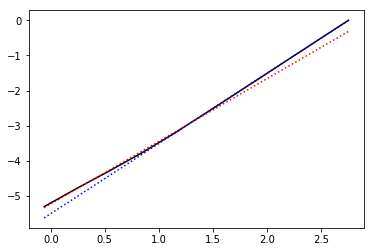

In [132]:
logfig = plt.figure()
logax  = plt.gca()
logax.plot(BS, FC, 'k', BS, DDfitline, 'r:', BS, DLfitline, 'b:')
#logax.set_yscale('log')
#logax.set_xscale('log')

Interestingly, this figure matches theirs pretty well, despite the different slopes (dimensions) I found. They plotted their X axis on a log scale of millimeters but I think must have used log values for the fit lines. I just realized that the figure I'm comparing is for a different Pollock painting, but the principle is the same.

![Fractal expressionism, Taylor, Micolich, Jonas](./FractalImg/TaylorExampleFigure.png)

My slope values still differ from their reported $D_{D}$ value of 1.45 for *Number 14, 1948*. But $D_{L} > D_{D}$ and $D_{L} = 1.995 \approx 2$

![Fractal expressionism, Taylor, Micolich, Jonas](./FractalImg/TaylorExampleFigure2.png)